# 문제 정의

제공 받은 Dataset은 age, anaemia, high blood pressure, diabetes 등의 병원데이터라고 추측되는 데이터이고 DEATH_EVENT는 해당 환자의 사후관리 기간 중 사망한 경우를 나타냅니다.

데이터 준비하기

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

np.set_printoptions(suppress=True)
# 랜덤 시드 고정시키기
np.random.seed(5)

데이터 준비하기

In [2]:
dataset = np.loadtxt('dataset.csv', delimiter=',',skiprows=1)
dataset

array([[  75.,  582.,   20., ...,  130.,    4.,    1.],
       [  55., 7861.,   38., ...,  136.,    6.,    1.],
       [  65.,  146.,   20., ...,  129.,    7.,    1.],
       ...,
       [  45., 2060.,   60., ...,  138.,  278.,    0.],
       [  45., 2413.,   38., ...,  140.,  280.,    0.],
       [  50.,  196.,   45., ...,  136.,  285.,    0.]])

In [3]:
# 학습 데이터 210개 가져오기
X_train = dataset[:210,0:7]
y_train = dataset[:210, 7]

# 테스트 데이터 89개 가져오기
X_test = dataset[210:, 0:7]
y_test = dataset[210:, 7]

print(X_train.shape, X_test.shape)

(210, 7) (89, 7)


모델 구성하기

In [4]:
model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32)

Epoch 1/100
7/7 [==============================] - 14s 3ms/step - loss: 1242.5540 - accuracy: 0.6008
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 438.0339 - accuracy: 0.5996
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 138.3605 - accuracy: 0.4427
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 105.5974 - accuracy: 0.4740
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 134.2760 - accuracy: 0.5761
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 31.0250 - accuracy: 0.4481
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 23.1296 - accuracy: 0.5866
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 15.7830 - accuracy: 0.5684
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 25.1702 - accuracy: 0.4816
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 34.0376 - accuracy: 0.4729
Epoch 11/100

학습 결과 그려보기

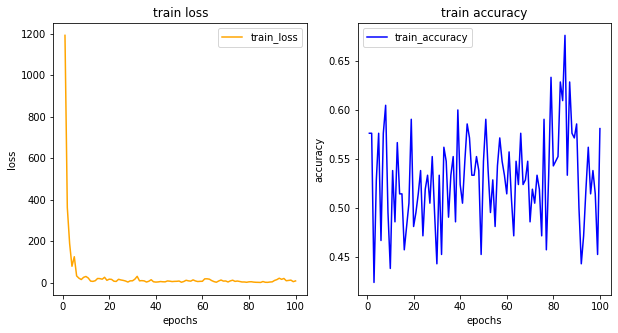

In [15]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

모델 평가하기

In [9]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 1s 4ms/step - loss: 2.9080 - accuracy: 0.9213
accuracy: 92.13%


In [10]:
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [11]:
# 모델 예측하기
result = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
from sklearn import metrics
report = metrics.classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        82
         1.0       0.00      0.00      0.00         7

    accuracy                           0.92        89
   macro avg       0.46      0.50      0.48        89
weighted avg       0.85      0.92      0.88        89



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(metrics.precision_score(y_test,result))
print(metrics.recall_score(y_test,result))

0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


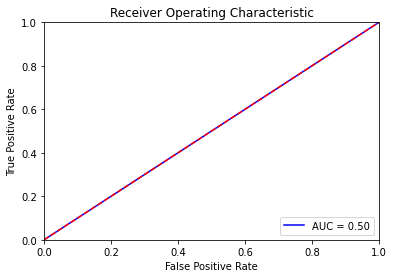

In [14]:
plot_auc_roc(model)